## Lab | Cleaning numerical data ##
Antonio Montilla

#### 1. Import the necessary libraries.

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

#### 3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount ####

In [4]:
display(customer_df.head())
display(customer_df.shape)
display(customer_df.columns)
display(customer_df.info)
display(customer_df.describe().T)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores) ####

In [5]:
cols = []
for colname in customer_df.columns:
    cols.append(colname.lower())
converter = lambda x: x.replace(' ', '_')
cols = list(map(converter, cols))
customer_df.columns = cols
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### 5. Change effective to date column to datetime format.

In [6]:
display(customer_df.head().T)
display(customer_df['effective_to_date'].dtype)


,0,1,2,3,4
customer,BU79786,QZ44356,AI49188,WW63253,HB64268
state,Washington,Arizona,Nevada,California,Washington
customer_lifetime_value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
response,No,No,No,No,No
coverage,Basic,Extended,Premium,Basic,Basic
education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
effective_to_date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
employmentstatus,Employed,Unemployed,Employed,Unemployed,Employed
gender,F,F,F,M,M
income,56274,0,48767,0,43836


dtype('O')

In [7]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])

In [8]:
display(customer_df.head().T)
display(customer_df['effective_to_date'].dtype)

,0,1,2,3,4
customer,BU79786,QZ44356,AI49188,WW63253,HB64268
state,Washington,Arizona,Nevada,California,Washington
customer_lifetime_value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
response,No,No,No,No,No
coverage,Basic,Extended,Premium,Basic,Basic
education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
effective_to_date,2011-02-24 00:00:00,2011-01-31 00:00:00,2011-02-19 00:00:00,2011-01-20 00:00:00,2011-02-03 00:00:00
employmentstatus,Employed,Unemployed,Employed,Unemployed,Employed
gender,F,F,F,M,M
income,56274,0,48767,0,43836


dtype('<M8[ns]')

#### 6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [9]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


#### 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [10]:
#Will define a function that will classify columns as continuos or descrete based on the number of unique values, setting a threshold of 50 as default:

def categorize_variables(dataframe, threshold=50):
    continuous_vars = []
    discrete_vars = []
    
    for col in dataframe.columns:
        unique_count = dataframe[col].nunique()
        if unique_count > threshold:
            continuous_vars.append(col)
        else:
            discrete_vars.append(col)

    return continuous_vars, discrete_vars
    

In [11]:
#applying function to numerical_df using 100 as threshold:

categorize_variables(numerical_df, 100)

(['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'total_claim_amount'],
 ['months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies'])

In [12]:
#Using the formula to categorize columns and then create new dataframe
continuous_var = categorize_variables(numerical_df, 100)[0]
discrete_var = categorize_variables(numerical_df, 100)[1]
continuous_df = customer_df[continuous_var]
discrete_df = customer_df[discrete_var]
display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


#### 8. Plot a correlation matrix, comment what you see.

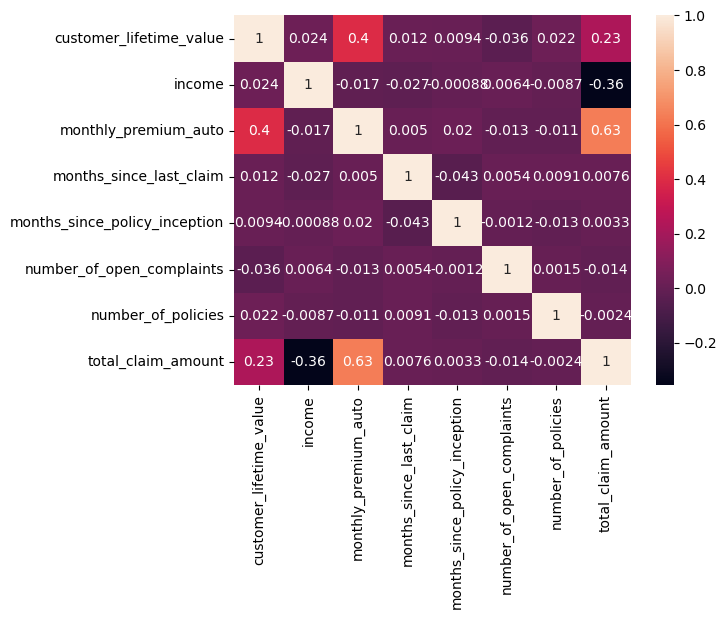

In [13]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

- The correlation matrix suggests that in most cases there are not strong relationships between two specific columns.
- The exception could be in the link between monthly_premium_auto and total_claim_amount (correlation coefficient of 0.6), but given that the latter is the target column this should not represent an issue later on in the modeling part.


#### 9. Create a function to plot every discrete variable. Do the same with the continuous variables.
#### 10. Comment what you can see in the plots.

In [14]:
#for continuous columns:
def plotting_continuous(continuous_df):
    col = continuous_df.columns
    for c in col:
        sns.distplot(continuous_df[c])
        plt.show()


/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_9868/743834649.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_df[c])


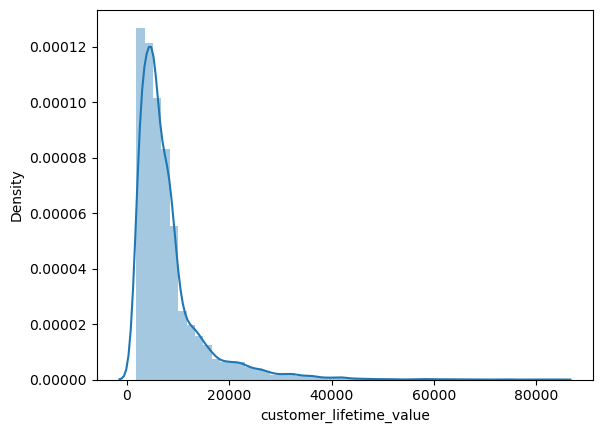

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_9868/743834649.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_df[c])


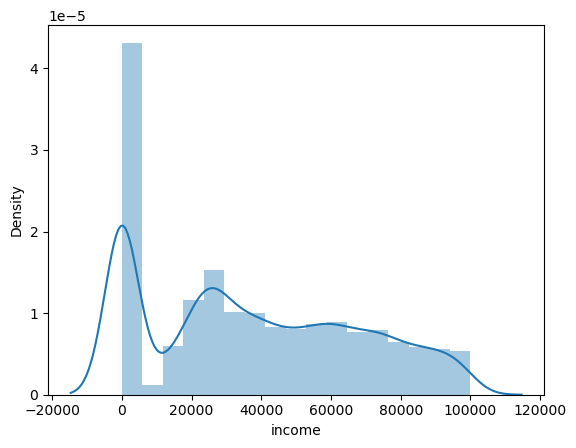

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_9868/743834649.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_df[c])


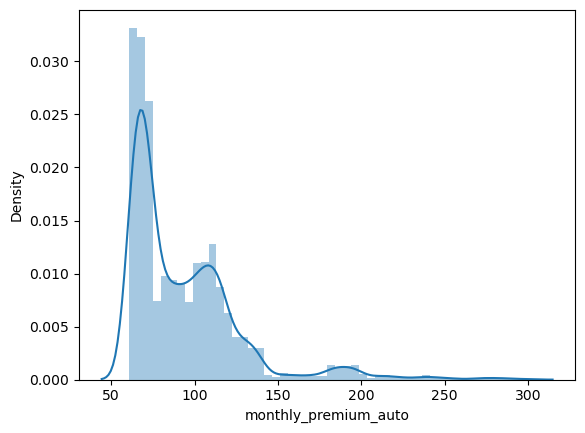

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_9868/743834649.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(continuous_df[c])


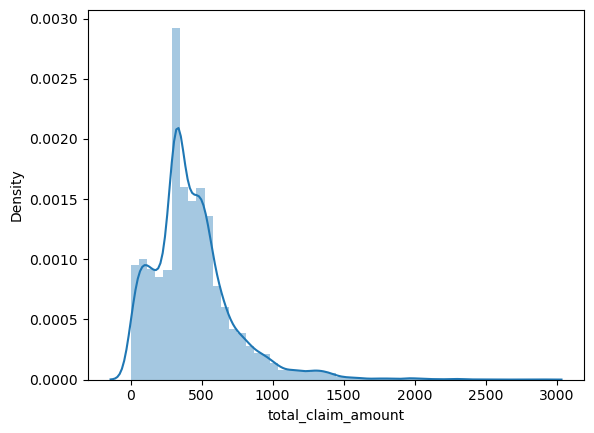

In [15]:
plotting_continuous(continuous_df)

- From the histograms, I can see that the target column "total_claim_amount" is indeed continouos ranging from 0 to around 3000. The distribution looks as it could be normal-shaped.
- The same observation could be taken from 'customer_lifetime_value', although the distribution is skewed to the left, hinting at the precense of outliers or some observations with large values relative to the median.
- For monthly_premium_auto there seems to be also some observations that are well above the median values.
- For income, except for the large number of observations with zero, the rest of the distribution seems pretty "normal".

In [16]:
#for discrete columns:
def plotting_discrete(discrete_df):
    col = discrete_df.columns
    for c in col:
        sns.countplot(x=c, data=discrete_df)
        plt.show()

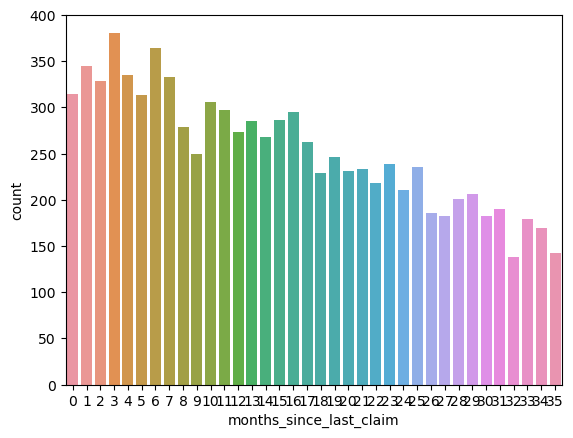

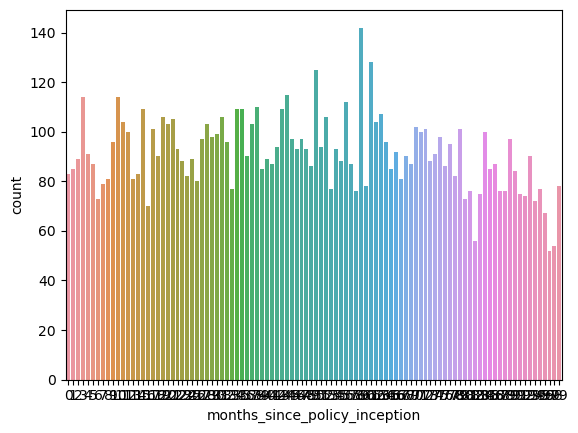

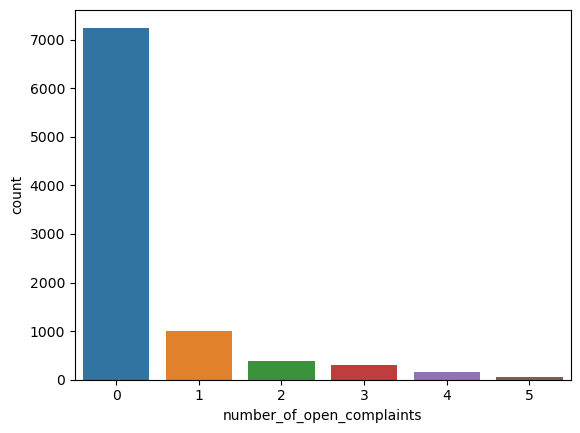

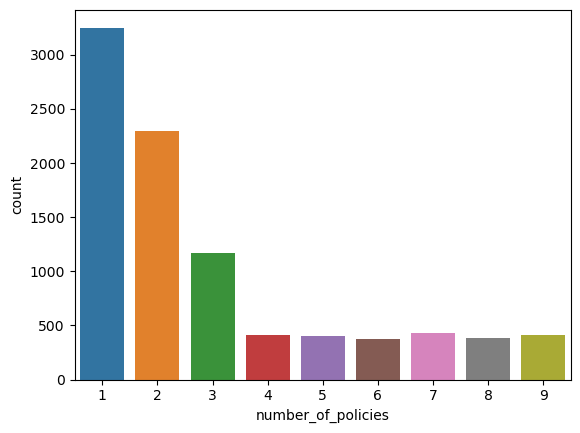

In [17]:
plotting_discrete(discrete_df)

- The first observations looking at the discrete columns is that both 'months_since_last_claim" and "months_since_policy_inception" have a large number of unique values. 
- Later on, it could be useful to regroup these columns into new categories.
- The number_of_policies and number_of_open_complaints on the other hand take a lower amount of unique values.
- However, for the former, the data seem to be biased to the value zero, while other categories (4, 5) have very little amount of observations.

#### 11. Look for outliers in the continuous variables.  ####

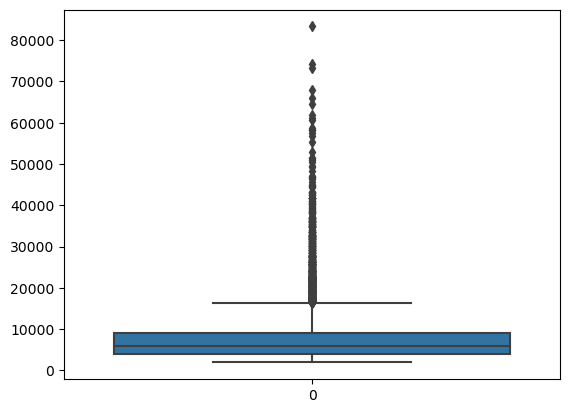

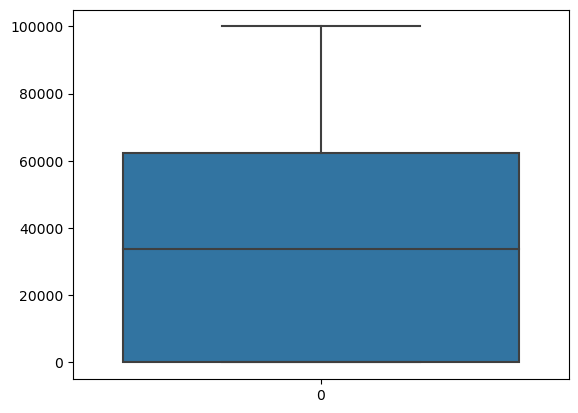

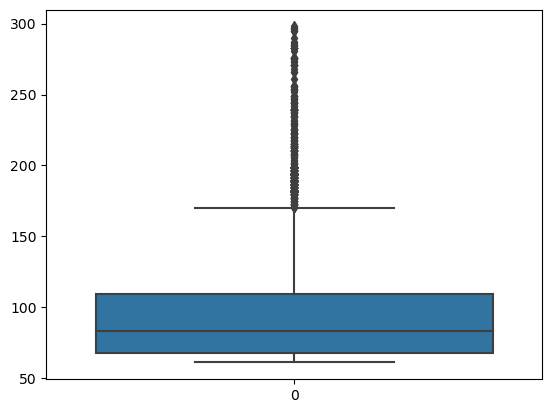

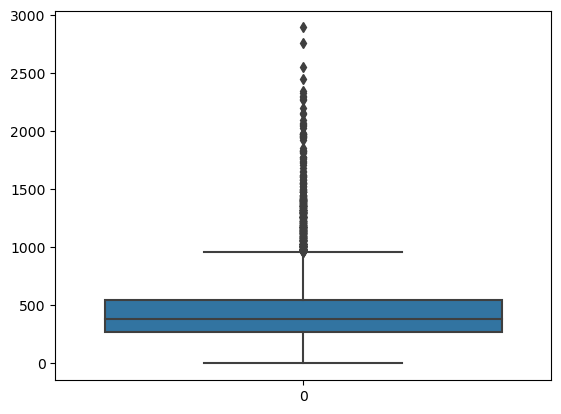

In [18]:
col = continuous_df.columns
for c in col:
    sns.boxplot(continuous_df[c])
    plt.show()

- As suggested when looking at the histograms, there seems to be outliers in most of the continuous columns.
- This is particularly true for the the first column ("customer_lifetime_value"), the third one ("monthly_premium_auto") and the target column ("total_claim_amount").

In [19]:
#Will check the number of potential outliers for these columns with the use of a function to count those using the iqr rule

def number_outliers(df, column):
    iqr = np.nanpercentile(df[column],75) - np.nanpercentile(df[column],25)
    upper_limit = np.nanpercentile(df[column],75) + 1.5*iqr
    extraordinary_points = df[df[column] >upper_limit]
    return upper_limit, len(extraordinary_points) 


In [20]:
number_outliers(continuous_df, 'customer_lifetime_value')

(16414.039911750002, 817)

In [21]:
number_outliers(continuous_df, 'monthly_premium_auto')

(170.5, 430)

In [22]:
number_outliers(continuous_df, 'total_claim_amount')

(960.3997301249999, 453)

#### 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

- There is a large amount of outliers for the three columns 'customer_lifetime_value', 'monthly_premium_auto' and 'total_claim_amount'.
- Giving that removing these will result in a significant loss of information, I have decided to continue with those and later on check if removing these could have some impact on the outcome of a potential model

#### 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now. 

In [23]:
display(numerical_df.isnull().sum())
display(numerical_df.isnull().sum()/len(numerical_df))

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [24]:
display(numerical_df.isna().sum())
display(numerical_df.isna().sum()/len(numerical_df))

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [25]:
#At first inspection there seems to be none NaNs in the numerical df. 
#will still check value_counts for each of the discrete columns:
for c in discrete_df.columns:
    display(discrete_df[c].value_counts(dropna = False))

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

59    142
61    128
50    125
44    115
3     114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: months_since_policy_inception, Length: 100, dtype: int64

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

#### 14. Save the numerical_df to csv as numerical.csv 

In [26]:
numerical_df.to_csv('numerical.csv', index=False)

## Lab | Cleaning categorical data

#### 1. Open the notebook created for Lab-cleaning-numerical-data.
#### 2. Find all of the categorical data. Save it in a categorical_df variable.

In [27]:
categorical_df = customer_df.select_dtypes(object)
display(categorical_df.head())
display(categorical_df.shape)
display(categorical_df.columns)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(9134, 15)

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### 3. Check for NaN values and decide what to do with them, do it now.

In [28]:
display(categorical_df.isnull().sum())
display(categorical_df.isnull().sum()/len(categorical_df))

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

customer            0.0
state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

In [29]:
display(categorical_df.isna().sum())
display(categorical_df.isna().sum()/len(categorical_df))

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

customer            0.0
state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

#### 4. Check all unique values of columns.

In [30]:
#initial check to value_counts (to see if there is any space or other strange character that could be 'nan'):
for c in categorical_df.columns:
    display(categorical_df[c].value_counts(dropna = False))

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

#### 5. Check dtypes. Do they all make sense as categorical data?

In [31]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [32]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


- All variables are categoricals. Some of these, however, could in principle be threated as numerical, e.g. 'response' which takes "no" or "yes" which could be transformed into a (0,1) column. Same for 'gender' or 'renew_offer_type'.
- However, this process will be achieved when transforming the columns using onehotencoding. There seems to be not much to gain from transforming any of the categoricals at this stage.

#### 6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

- The column 'customer' does indeed contain alpha numerical characters. However, this column accounts for a unique reference for each customer and therefore will not be of much use when extracting information to estimate the target column.
- The column 'policy' contains information of the type of policy (i.e. personal, corporate or special) and the level (i.e. L1, L2, L3). The first information, however, is already contained in the column 'policy type'. Therefore, it will make sense to aggregate these categories into "1", "2" or "3".

In [33]:
#cleaning 'policy'
categorical_df.groupby(['policy_type', 'policy'])['policy'].count()
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Corporate L1','1', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Corporate L2','2', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Corporate L3','3', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Personal L1','1', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Personal L2','2', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Personal L3','3', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Special L1','1', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Special L2','2', categorical_df['policy'])
categorical_df['policy'] = np.where(categorical_df['policy'] == 'Special L3','3', categorical_df['policy'])

In [34]:
categorical_df['policy'].value_counts(dropna = False)

3    4588
2    2881
1    1665
Name: policy, dtype: int64

#### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

For other categorical columns, based on the information from value_counts, I will probably do the following:
- 'renew_offer_type': replace it for a int column with values 1, 2, 3, 4 based on the information available.
- 'education': aggregate the two categories 'Master' and 'Doctor' into 1 ('postgraduate').
- 'employmentstatus': aggregate the small categories ('Medical Leave', 'Disabled', 'Retired') into 1 ('other').
- 'vehicle_class': aggregate the small categories ('Sports Car', 'Luxury SUV', 'Luxury Car') into 1 ('Luxury')

In [35]:
#Cleaning 'renew_offer_type'
categorical_df['renew_offer_type'].value_counts(dropna = False)
categorical_df['renew_offer_type'] = np.where(categorical_df['renew_offer_type'] == 'Offer1','1', categorical_df['renew_offer_type'])
categorical_df['renew_offer_type'] = np.where(categorical_df['renew_offer_type'] == 'Offer2','2', categorical_df['renew_offer_type'])
categorical_df['renew_offer_type'] = np.where(categorical_df['renew_offer_type'] == 'Offer3','3', categorical_df['renew_offer_type'])
categorical_df['renew_offer_type'] = np.where(categorical_df['renew_offer_type'] == 'Offer4','4', categorical_df['renew_offer_type'])

In [36]:
categorical_df['renew_offer_type'].value_counts(dropna = False)

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

In [37]:
#Cleaning 'education':
display(categorical_df.education.value_counts(dropna = False))
minor_cat = ['Master', 'Doctor']
categorical_df['education'] = np.where(categorical_df.education.isin(minor_cat),'postgraduate', categorical_df.education)
display(categorical_df.education.value_counts(dropna = False))

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
postgraduate            1083
Name: education, dtype: int64

In [38]:
#Cleaning 'employmentstatus':
display(categorical_df.employmentstatus.value_counts(dropna = False))
minor_cat = ['Medical Leave', 'Disabled', 'Retired']
categorical_df['employmentstatus'] = np.where(categorical_df.employmentstatus.isin(minor_cat),'Other', categorical_df.employmentstatus)
display(categorical_df.employmentstatus.value_counts(dropna = False))

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

In [39]:
#Cleaning 'vehicle_class':
display(categorical_df.vehicle_class.value_counts(dropna = False))
minor_cat = ['Sports Car', 'Luxury SUV', 'Luxury Car']
categorical_df['vehicle_class'] = np.where(categorical_df.vehicle_class.isin(minor_cat),'Luxury', categorical_df.vehicle_class)
display(categorical_df.vehicle_class.value_counts(dropna = False))

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

#### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

- I transformed the 'policy' column already in step 6 after observing that these two columns contain similar information. My answer is above in this same notebook

#### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [40]:
for c in categorical_df.columns:
    display(categorical_df[c].value_counts(dropna = False))

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
postgraduate            1083
Name: education, dtype: int64

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

3    4588
2    2881
1    1665
Name: policy, dtype: int64

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

- After the transformation decided and applied in steps 6-7, I will not do any additional transformations to the categorical variables at this stage

#### 10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [41]:
categorical_df.to_csv('categorical.csv', index=False)

## Lab | Feature extraction ##

#### 1. Open the categorical dataframe we created before.

In [42]:
categorical_df = pd.read_csv('categorical.csv')

In [43]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


#### 2. Plot all the categorical variables with the proper plot. What can you see?

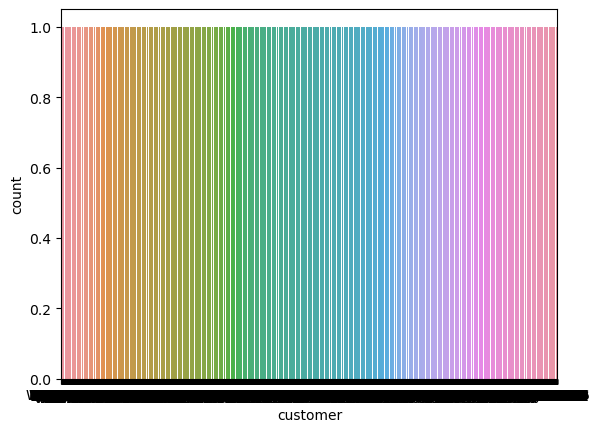

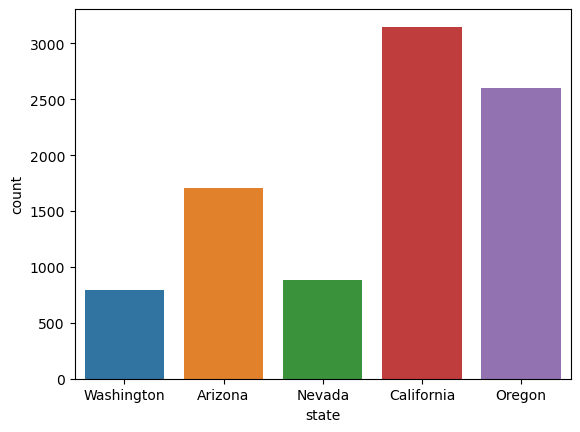

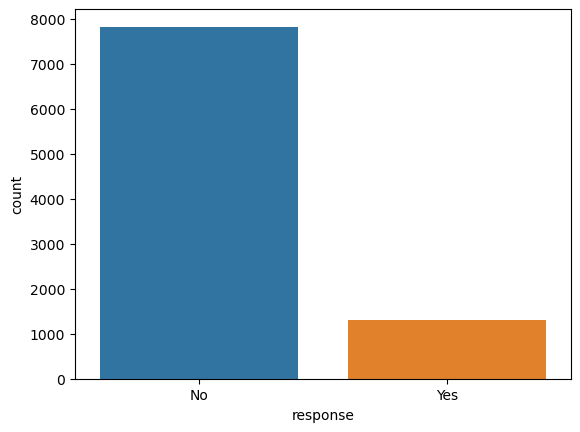

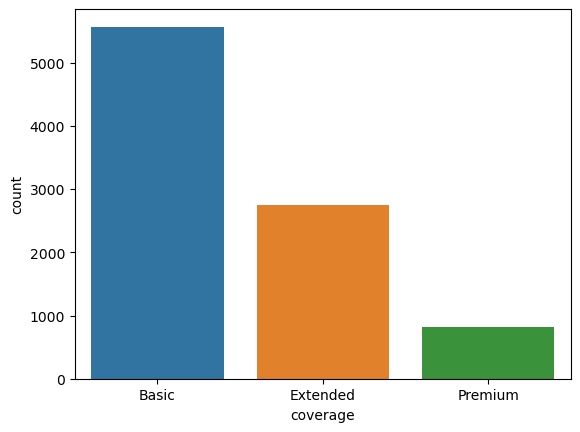

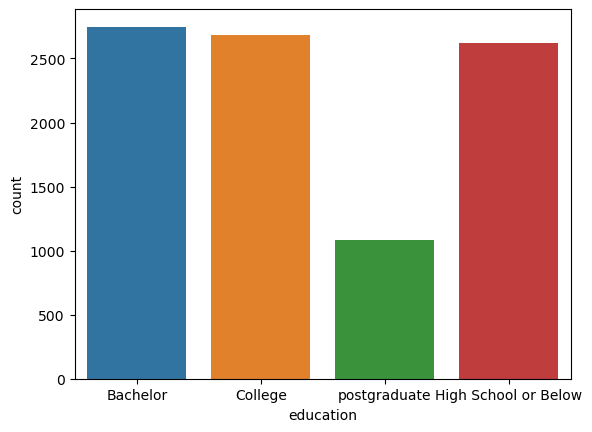

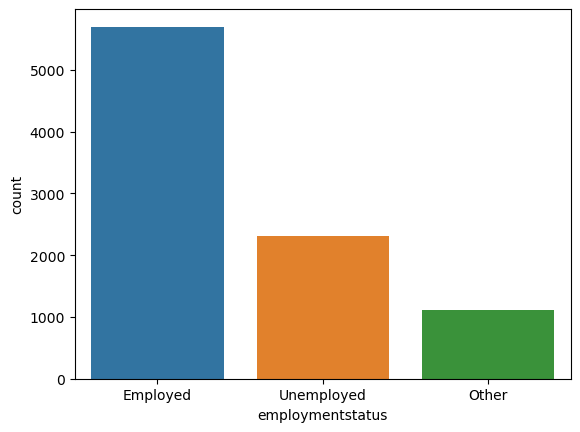

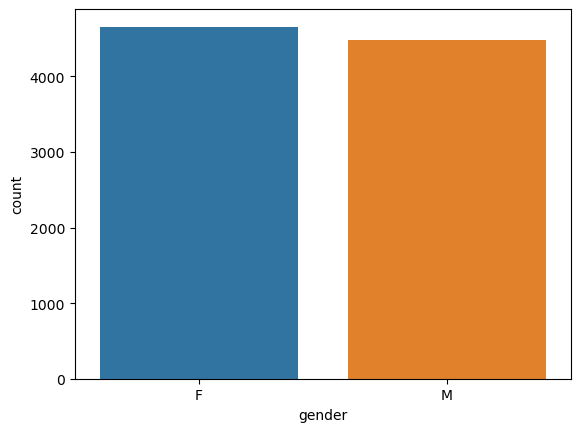

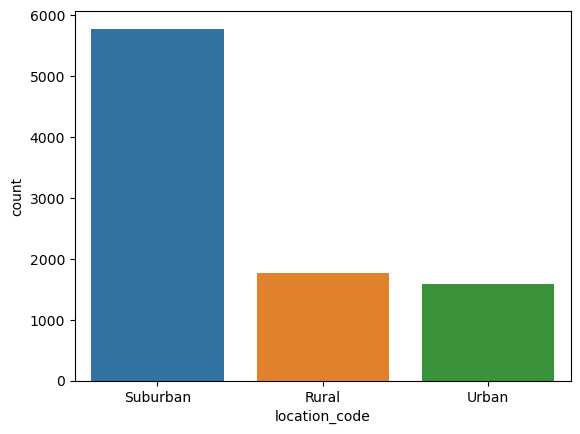

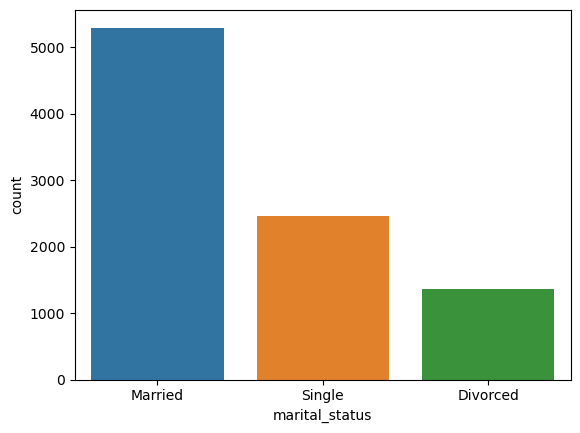

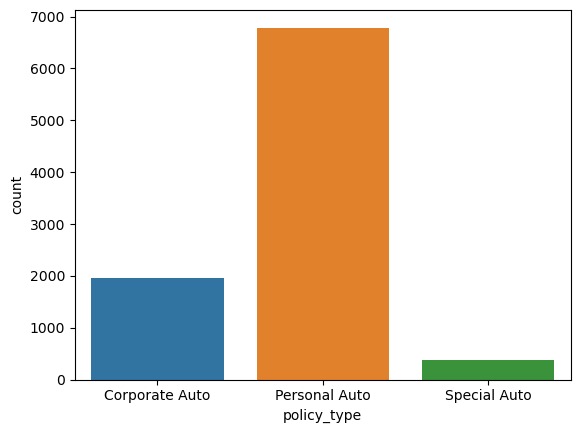

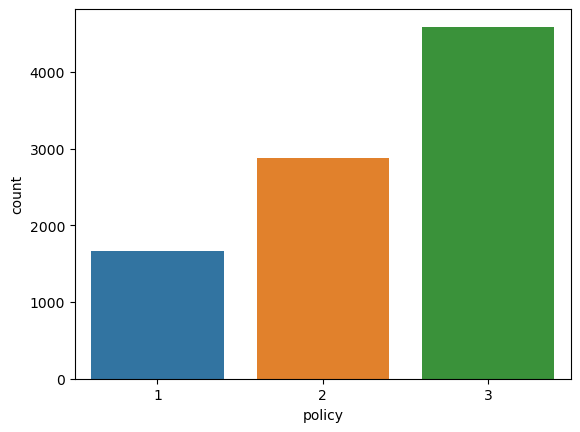

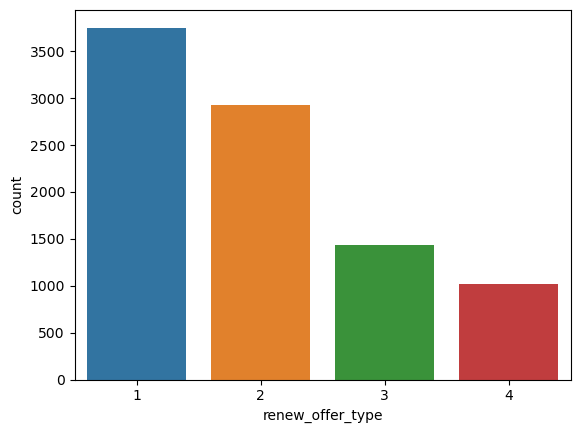

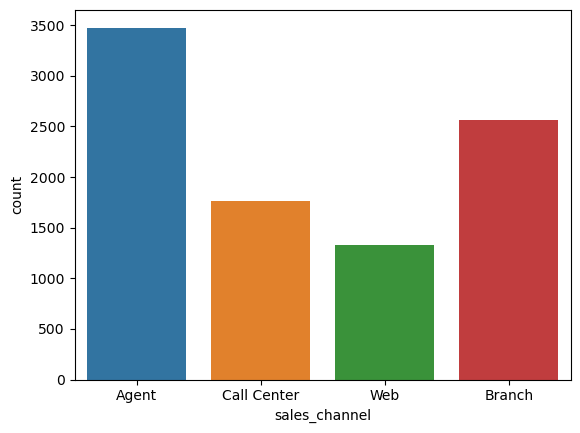

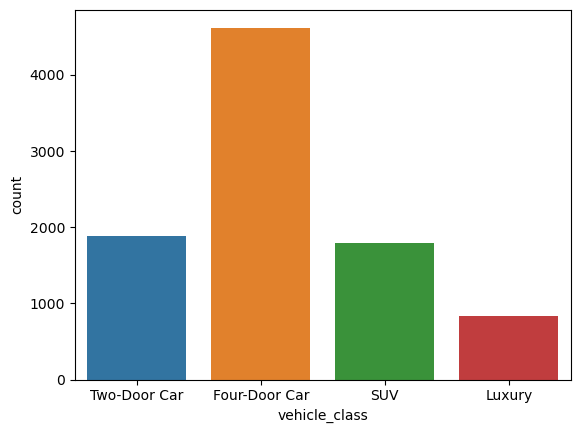

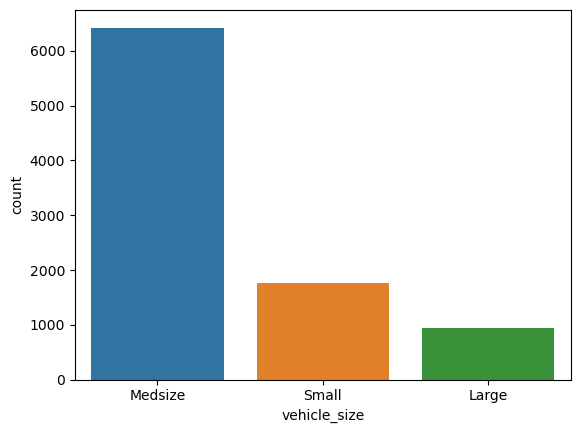

In [44]:
for c in categorical_df.columns:
    sns.countplot(x=c, data=categorical_df)
    plt.show()

- Following the transformation I executed in the previous steps, it will be necessary to declare some of these categorical variables into numeric and move them to the 'numerical_df', so it can be scaled.
- This is true for 'renew_offer_type' and 'policy'.
- For other variables, it could also make sense to assign a ordinal encoding before also declaring as and moving to  numerical_df. This procedure could be done for 'coverage' and 'education'. Will do these transformation in the following steps.
- The column 'customer' is a unique reference of each customer and, as it will not add any information to the modelling part, should also be removed.

#### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them? - Make any changes you feel are necessary.

In [46]:
#assigning ordinal encoding to 'coverage' and 'education' but will leave for now in categorical_df (will need to move these two and 'renew_offer_type' and 'policy' to numerical_df later on)
#coverage
display(categorical_df['coverage'].value_counts(dropna = False))
categorical_df['coverage'] = categorical_df['coverage'].map({"Basic" : 0, "Extended": 1, "Premium": 2})
display(categorical_df['coverage'].value_counts(dropna = False))

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

0    5568
1    2742
2     824
Name: coverage, dtype: int64

In [48]:
#education
display(categorical_df['education'].value_counts(dropna = False))
categorical_df['education'] = categorical_df['education'].map({"High School or Below" : 0, "College": 1, "Bachelor": 3, "postgraduate": 4})
display(categorical_df['education'].value_counts(dropna = False))

Bachelor                2748
College                 2681
High School or Below    2622
postgraduate            1083
Name: education, dtype: int64

3    2748
1    2681
0    2622
4    1083
Name: education, dtype: int64

In [49]:
#dropping the 'customer' column
categorical_df = categorical_df.drop(['customer'], axis = 1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0,3,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,1,3,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,2,3,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,0,3,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,0,3,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,3,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,California,Yes,1,1,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,California,No,1,3,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,California,No,1,1,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


#### 4. Plot time variable. Can you extract something from it?

In [54]:
#will add this column to categorical as it was done after declaring as datetime
customer_df.shape[0] == categorical_df.shape[0] 
categorical_df["effective_to_date"] = customer_df["effective_to_date"]
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,Washington,No,0,3,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize,2011-02-24
1,Arizona,No,1,3,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize,2011-01-31
2,Nevada,No,2,3,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize,2011-02-19
3,California,No,0,3,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize,2011-01-20
4,Washington,No,0,3,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize,2011-02-03


/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_9868/3861978666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(categorical_df["effective_to_date"])


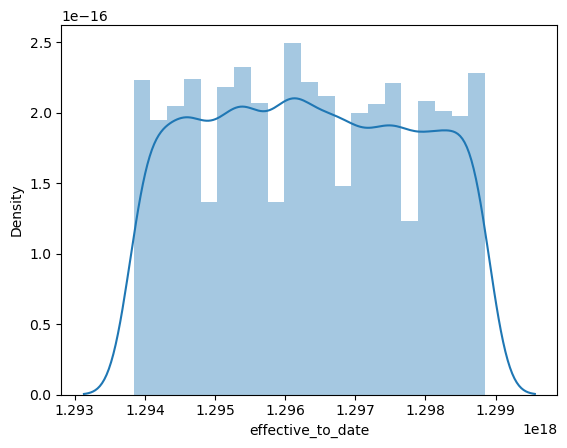

In [55]:
sns.distplot(categorical_df["effective_to_date"])
plt.show()
#difficult to read the histogram when date is in this format. Will extract it into separate columns in the following step.

#### 5. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [57]:
#creating columns for day of the week, week of the year and month of th eyear:
categorical_df['day_of_week'] = categorical_df['effective_to_date'].dt.dayofweek 
categorical_df['week_number'] = categorical_df['effective_to_date'].dt.week
categorical_df['month_number'] = categorical_df['effective_to_date'].dt.month
#dropping the 'effective_to_date' column:
categorical_df = categorical_df.drop(['effective_to_date'], axis = 1)
categorical_df

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_9868/841481857.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  categorical_df['week_number'] = categorical_df['effective_to_date'].dt.week


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_of_week,week_number,month_number
0,Washington,No,0,3,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize,3,8,2
1,Arizona,No,1,3,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize,0,5,1
2,Nevada,No,2,3,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize,5,7,2
3,California,No,0,3,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize,3,3,1
4,Washington,No,0,3,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,3,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize,3,6,2
9130,California,Yes,1,1,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize,5,6,2
9131,California,No,1,3,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize,6,5,2
9132,California,No,1,1,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large,3,5,2


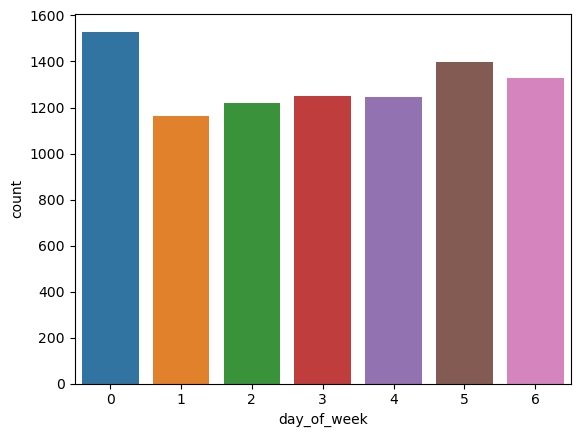

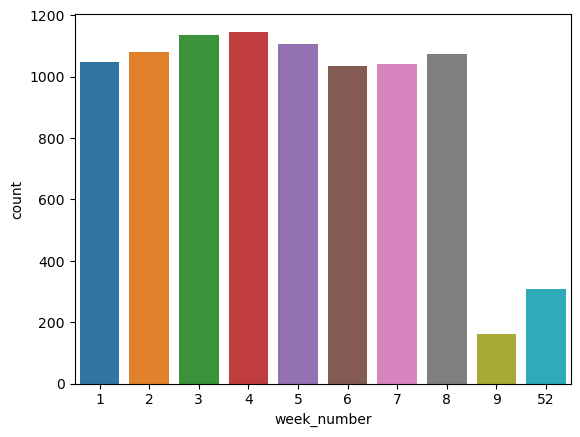

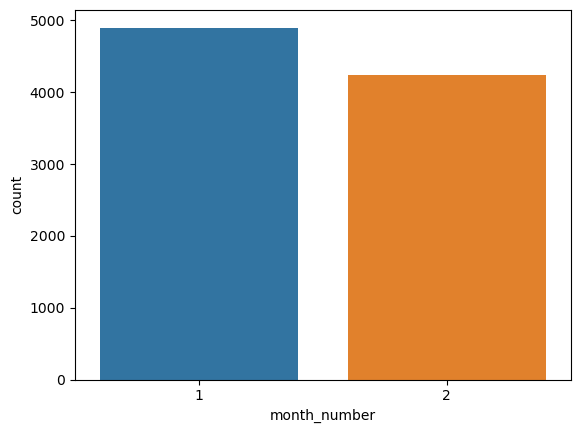

In [60]:
#Now plotting these new three columns:
sns.countplot(x='day_of_week', data=categorical_df)
plt.show()
sns.countplot(x='week_number', data=categorical_df)
plt.show()
sns.countplot(x='month_number', data=categorical_df)
plt.show()


In [62]:
#just to confirm the value counts of these three columns
display(categorical_df['day_of_week'].value_counts(dropna = False))
display(categorical_df['week_number'].value_counts(dropna = False))
display(categorical_df['month_number'].value_counts(dropna = False))
#from the data exploration, it seems that there are only observations with week_number between 1-9 and 52 (nothing in between).
#For months, there are only observations with either 1 or 2.

0    1530
5    1397
6    1330
3    1249
4    1245
2    1221
1    1162
Name: day_of_week, dtype: int64

4     1147
3     1137
5     1105
2     1079
8     1073
1     1049
7     1040
6     1035
52     308
9      161
Name: week_number, dtype: int64

1    4898
2    4236
Name: month_number, dtype: int64

#### Note: in following steps, I will need to move the following columns from categorical_df into numerical_df:
- 'education'
- 'coverage'
- 'renew_offer_type'
- 'policy'
- 'day_of_week'
- 'week_number'
- 'month_number'

In [63]:
#will save once more the categorical_df into a csv:
categorical_df.to_csv('categorical.csv', index=False)